In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive

drive.mount('/content/drive')
directory= '/content/drive/MyDrive/survey lung cancer.csv'
df = pd.read_csv(directory)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.colums = ["GENDER","LUNG_CANCER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","WHEEZING","ALCOHOL CONSUMING",
             "COUGHING","SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]

<ipython-input-3-e0f9108f9b32>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = ["GENDER","LUNG_CANCER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","WHEEZING","ALCOHOL CONSUMING",


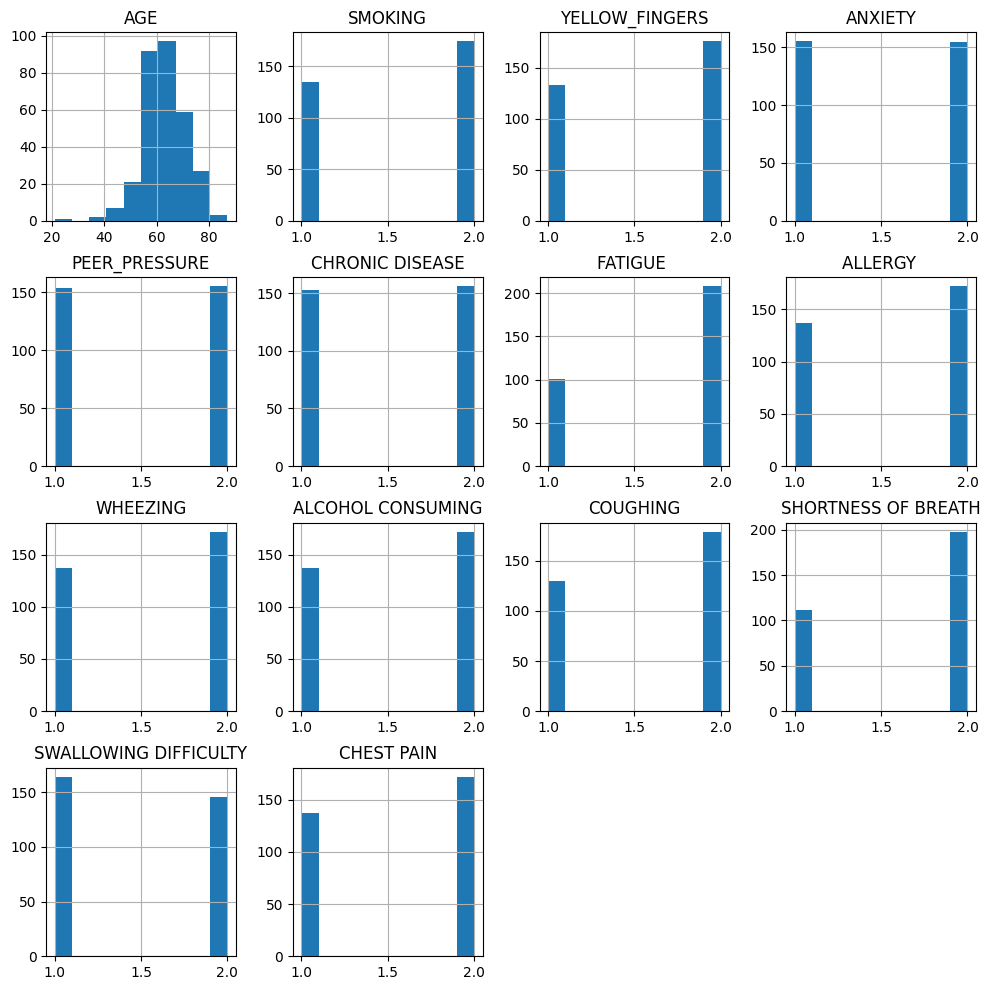

In [4]:
import matplotlib.pyplot as plt

df.hist(figsize = (12,12))
plt.show()

In [5]:
df["GENDER"].replace(["M","F"], [1,0], inplace=True)
df["LUNG_CANCER"].replace(["YES","NO"], [1,0], inplace=True)

x = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [6]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (247, 15)
Number transactions y_train dataset:  (247,)
Number transactions x_test dataset:  (62, 15)
Number transactions y_test dataset:  (62,)


In [8]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [9]:
y_pred = model.predict(x_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.9516129032258065
